In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv ("E_Commerce.csv")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [8]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [9]:
df.isnull().sum() # WE can Check for missing values

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [10]:
df['Reached.on.Time_Y.N'].value_counts() # to check distribution of the target variable

Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64

###   Data Preprocessing

In [11]:
label_encoder = LabelEncoder() #Encode categorical variables

In [12]:
df['Warehouse_block'] = label_encoder.fit_transform(df['Warehouse_block'])
df['Mode_of_Shipment'] = label_encoder.fit_transform(df['Mode_of_Shipment'])
df['Product_importance'] = label_encoder.fit_transform(df['Product_importance'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [13]:
X = df.drop(columns=['Reached.on.Time_Y.N'])
y = df['Reached.on.Time_Y.N'] # Separate features and target variable

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split the data into training and testing sets

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # Scale the features

### Model Selection and Training

In [16]:
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
} # Models taken here are random forest, decision tree, logistic regression, k- nearest 

In [17]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{name} Model')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print('-' * 40) #to  Train and evaluate model

Random Forest Model
Accuracy: 0.6818181818181818
              precision    recall  f1-score   support

           0       0.58      0.77      0.66       895
           1       0.80      0.62      0.70      1305

    accuracy                           0.68      2200
   macro avg       0.69      0.70      0.68      2200
weighted avg       0.71      0.68      0.68      2200

[[688 207]
 [493 812]]
----------------------------------------
Decision Tree Model
Accuracy: 0.6481818181818182
              precision    recall  f1-score   support

           0       0.57      0.54      0.55       895
           1       0.70      0.72      0.71      1305

    accuracy                           0.65      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.65      0.65      0.65      2200

[[482 413]
 [361 944]]
----------------------------------------
Logistic Regression Model
Accuracy: 0.6527272727272727
              precision    recall  f1-score   support

          

### Feature Importance and Visualization

In [18]:
rf_model = models['Random Forest']
importances = rf_model.feature_importances_ # Feature importance for Random Forest
features = X.columns

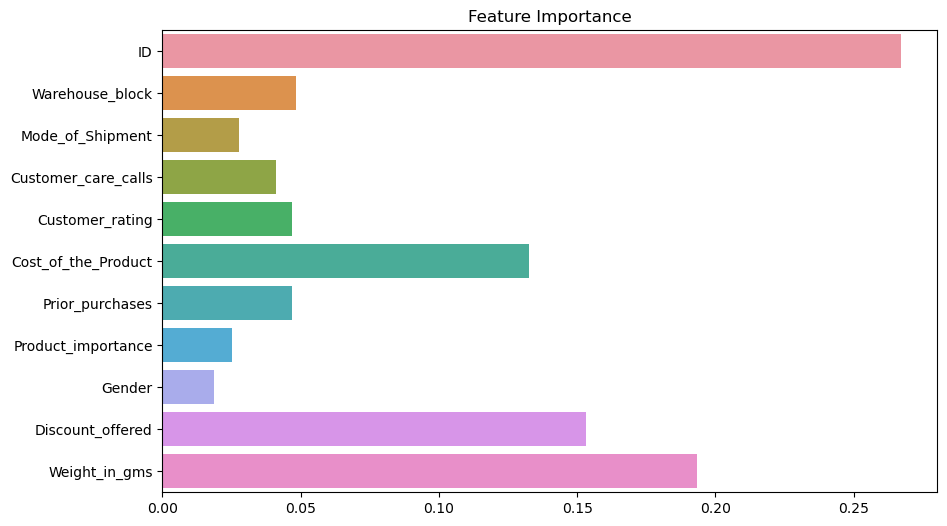

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features) # Plot feature importance
plt.title('Feature Importance')
plt.show()

### Distribution of Cost_of_the_Product

D:\yashvii\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


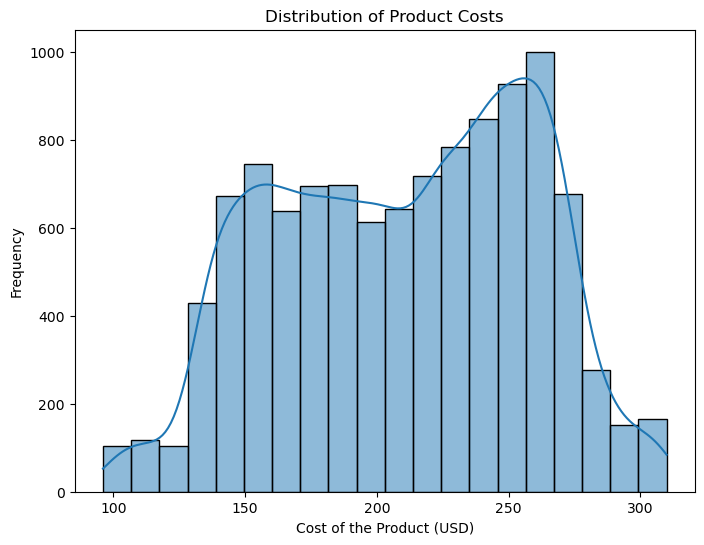

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Cost_of_the_Product'], bins=20, kde=True)
plt.title('Distribution of Product Costs')
plt.xlabel('Cost of the Product (USD)')
plt.ylabel('Frequency')
plt.show()
#This will show the distribution of product costs to help understand the price range of products in the dataset.

In [21]:
def categorical_vis(variable):
    
    var = df[variable].value_counts()
    
    x = var.index
    y = var
    if variable == "Reached.on.Time_Y.N":
        plt.bar(x,y,edgecolor="#1F1F1F",color='#636363')
        plt.title(variable,fontsize=12,fontweight="bold",color="#1F1F1F")
        plt.ylabel("Frequency")
        plt.xticks([0,1])
        plt.show()
        print("{}: \n {}".format(variable,var))
    else:
        plt.bar(x,y,edgecolor="#1F1F1F",color='#636363')
        plt.title(variable,fontsize=12,fontweight="bold",color="#1F1F1F")
        plt.ylabel("Frequency")
        plt.show()
        print("{}: \n {}".format(variable,var))

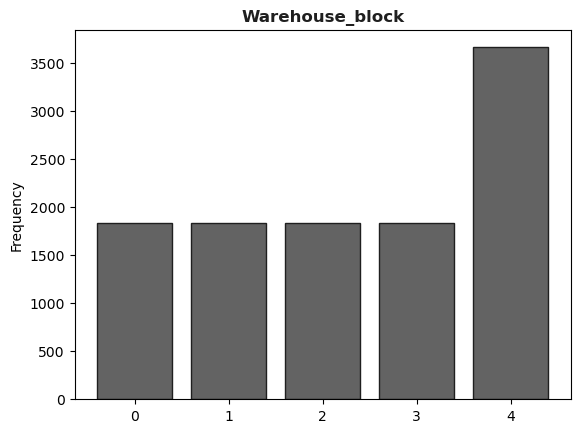

Warehouse_block: 
 Warehouse_block
4    3666
3    1834
0    1833
1    1833
2    1833
Name: count, dtype: int64


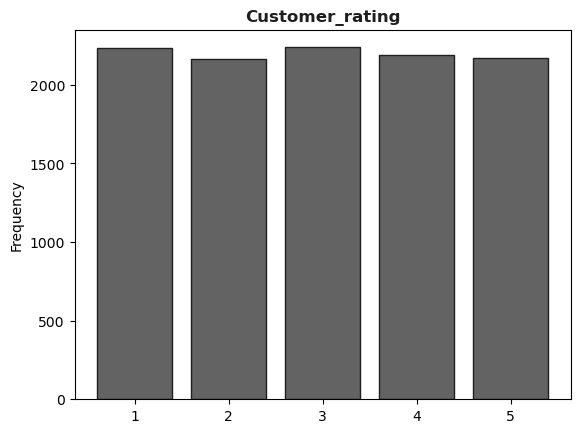

Customer_rating: 
 Customer_rating
3    2239
1    2235
4    2189
5    2171
2    2165
Name: count, dtype: int64


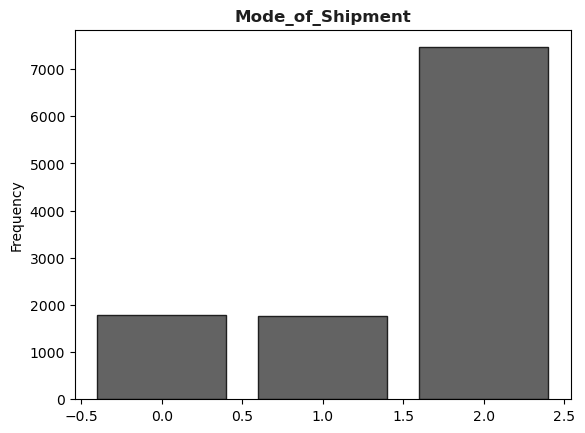

Mode_of_Shipment: 
 Mode_of_Shipment
2    7462
0    1777
1    1760
Name: count, dtype: int64


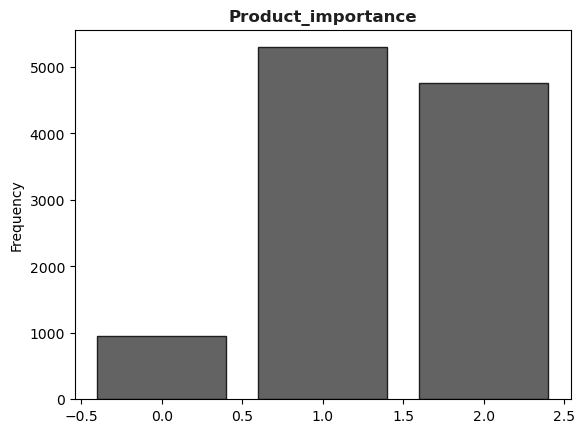

Product_importance: 
 Product_importance
1    5297
2    4754
0     948
Name: count, dtype: int64


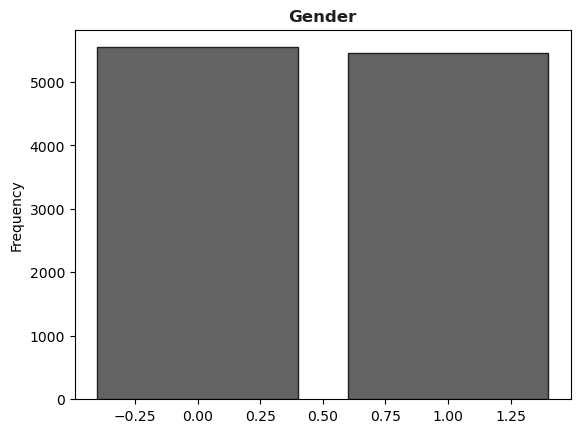

Gender: 
 Gender
0    5545
1    5454
Name: count, dtype: int64


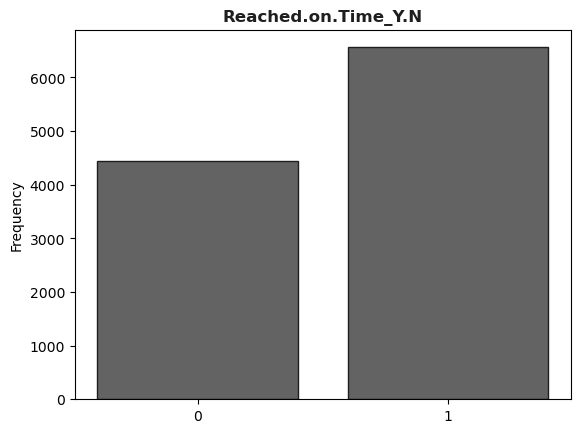

Reached.on.Time_Y.N: 
 Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64


In [22]:
categorical = ["Warehouse_block","Customer_rating","Mode_of_Shipment","Product_importance","Gender","Reached.on.Time_Y.N"]
for cat in categorical:
    categorical_vis(cat)

### Distribution of Target Variable (Reached.on.Time_Y.N)

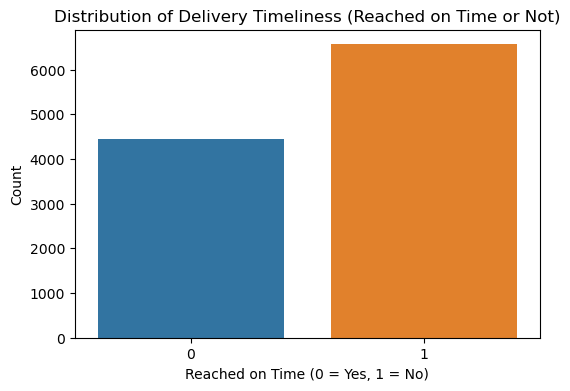

In [23]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Reached.on.Time_Y.N', data=df)
plt.title('Distribution of Delivery Timeliness (Reached on Time or Not)')
plt.xlabel('Reached on Time (0 = Yes, 1 = No)')
plt.ylabel('Count')
plt.show()  

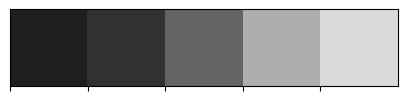

In [25]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
sns.palplot(colors_dark)

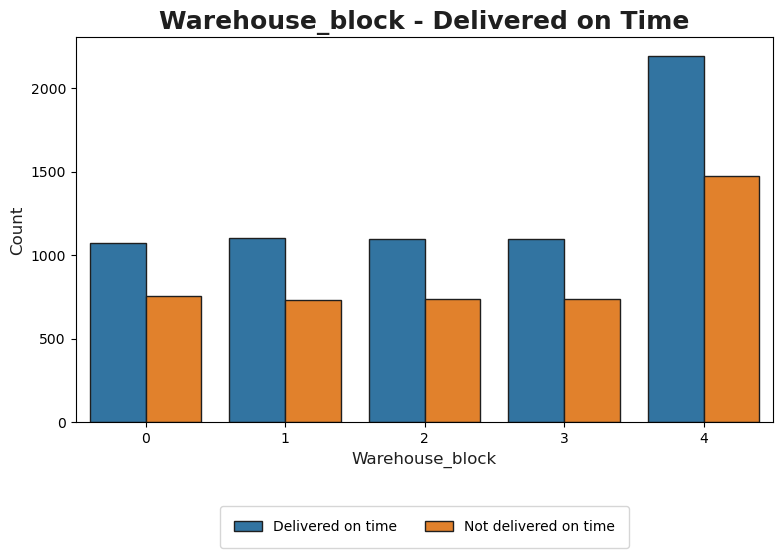

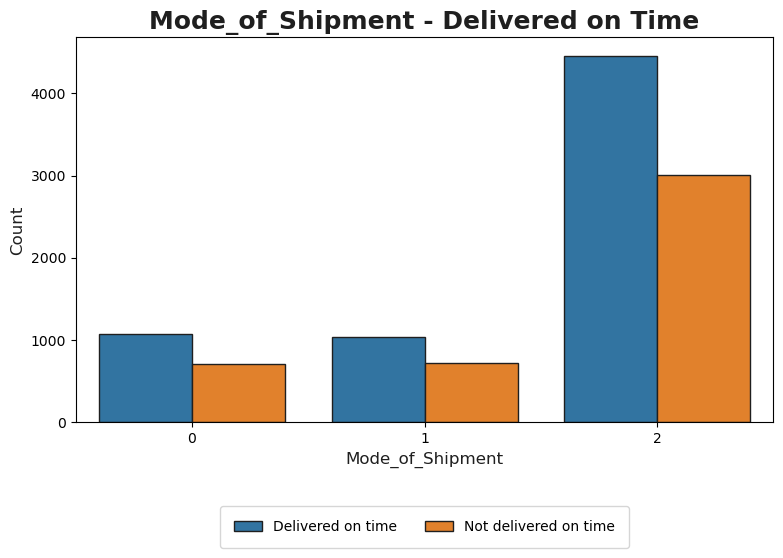

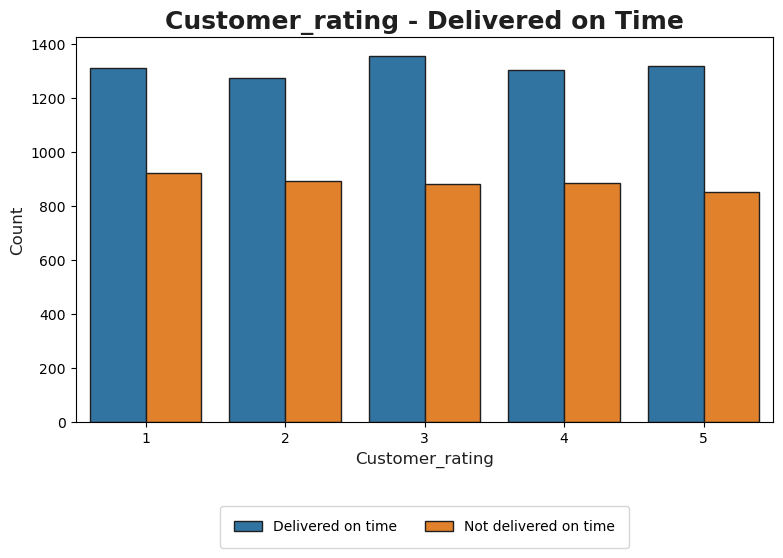

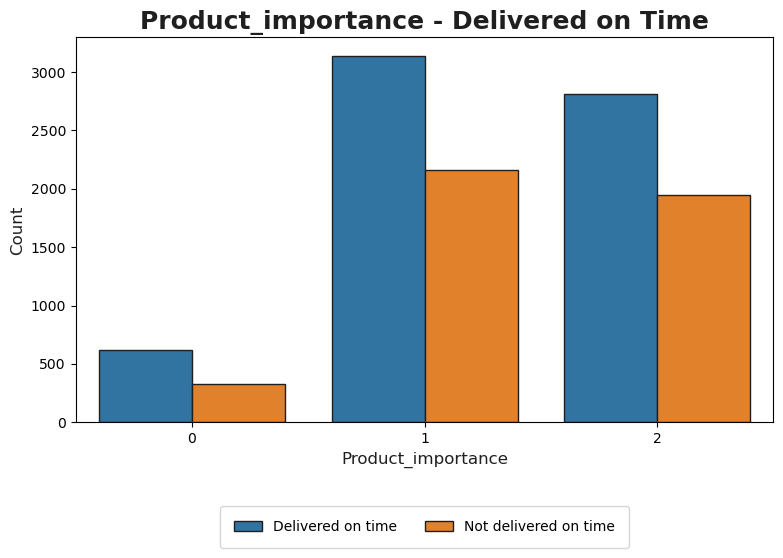

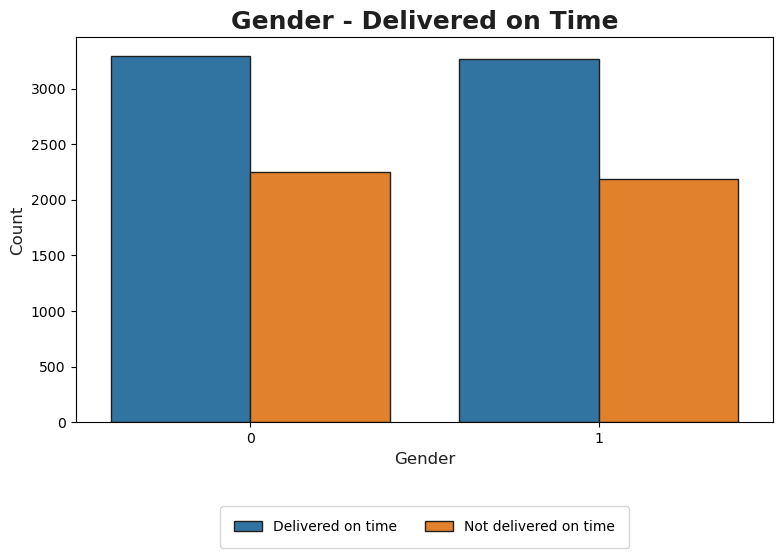

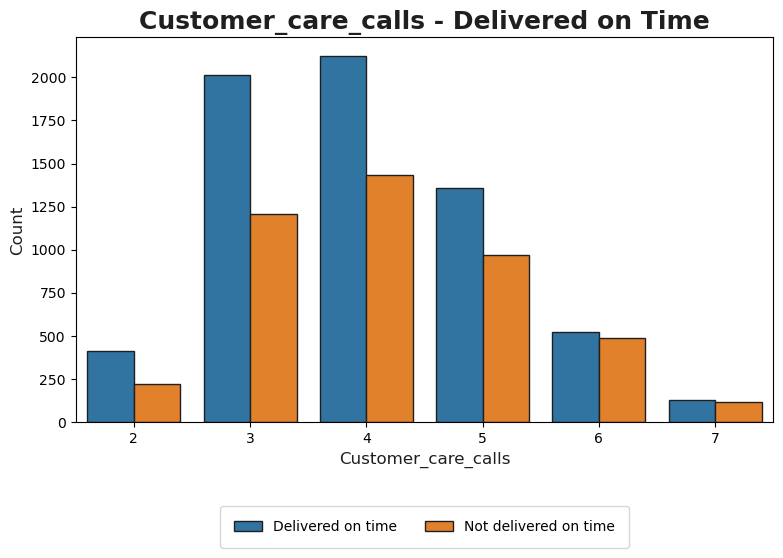

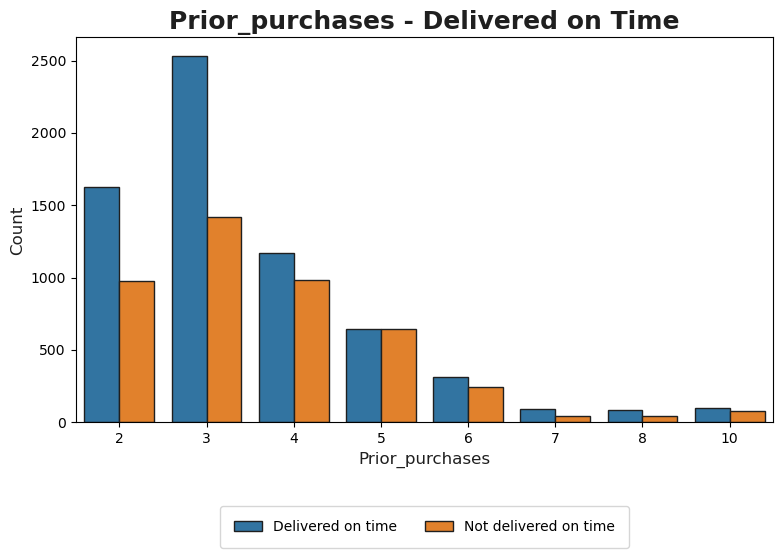

In [30]:
# Convert the 'Reached.on.Time_Y.N' column to string type if it is numeric
df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].astype(str)

# List of features to plot
features = ["Warehouse_block", "Mode_of_Shipment", "Customer_rating", 
            "Product_importance", "Gender", "Customer_care_calls", "Prior_purchases"]

# Loop over the features and create count plots
for f in features:
    fig, ax = plt.subplots(figsize=(9, 5))
    
    # Countplot for each feature with 'Reached.on.Time_Y.N' as hue
    sns.countplot(x=f, data=df, hue="Reached.on.Time_Y.N", edgecolor=colors_dark[0])
    
    # Modify the legend
    ax.legend(["Delivered on time", "Not delivered on time"], 
              loc='upper center', bbox_to_anchor=(0.5, -0.2), 
              ncol=2, borderpad=1, frameon=True, fontsize=10)
    
    # Set x and y labels
    plt.xlabel(f"{f}", fontsize=12, fontweight='light', color=colors_dark[0])
    plt.ylabel("Count", fontsize=12, fontweight='light', color=colors_dark[0])
    
    # Set title
    plt.title(f"{f} - Delivered on Time", fontsize=18, fontweight='bold', color=colors_dark[0])
    
    # Show plot
    plt.show()


<Axes: >

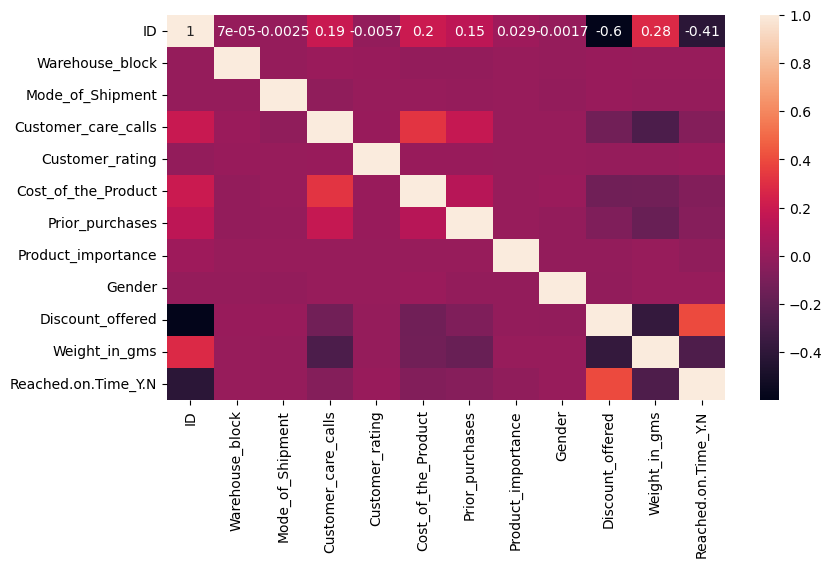

In [28]:
plt.figure(figsize=(9,5))
sns.heatmap(df.corr(),annot=True)

Correllation matrix shows relationships among features. We interpreted that if we give more than 10 dollar discount to our customer, this order probably will not be on time. As you can see there is a correalation between reached on time and discount offered. When discount offered is going up, reaching on time going down. That might be seems wrong to you but as you know 1: NOT reached on time, 0: Reached on time.
Cost of product and customer care calls have more strong relationship compared to other relationships. That means if our costumer pays more money for product, they have tendecy to have more customer care callls.